# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'4618967a6d53b500ef1b5745a1af96b0'

In [130]:
!pip install citipy


### Generate the Cities List by Using the `citipy` Library

In [136]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [112]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "q=" + city + "&appid=" + api_key
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  
        
#         city_lat = # YOUR CODE HERE
#         city_lng = # YOUR CODE HERE
#         city_max_temp = # YOUR CODE HERE
#         city_humidity = # YOUR CODE HERE
#         city_clouds = # YOUR CODE HERE
#         city_wind = # YOUR CODE HERE
#         city_country = # YOUR CODE HERE
#         city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | gao
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | felanitx
Processing Record 7 of Set 1 | kerema
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | gubkinskiy
Processing Record 10 of Set 1 | lebyazhye
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | araouane
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | leningradskiy
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | tome-acu
City not found. Skipping...
Processing Record 21 of Set 1 | warri
Processing Record 22 of Set 1 | tuktoyaktuk
Proc

Processing Record 39 of Set 4 | lusambo
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | dunn
Processing Record 42 of Set 4 | waynesville
Processing Record 43 of Set 4 | diffa
Processing Record 44 of Set 4 | bluff
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | shanhetun
Processing Record 47 of Set 4 | tiarei
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | sorland
Processing Record 1 of Set 5 | adrar
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | sulangan
Processing Record 5 of Set 5 | nguiu
City not found. Skipping...
Processing Record 6 of Set 5 | las palmas
Processing Record 7 of Set 5 | port shepstone
Processing Record 8 of Set 5 | llangefni
Processing Record 9 of Set 5 | severo-kurilsk
Processing Record 10 of Set 5 | provideniya
Processing Record 11 of Set 5 | belushya guba
City not found. Skipping..

Processing Record 33 of Set 8 | zambezi
Processing Record 34 of Set 8 | altar
Processing Record 35 of Set 8 | kutum
Processing Record 36 of Set 8 | kargasok
Processing Record 37 of Set 8 | padang
Processing Record 38 of Set 8 | nola
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | mocambique
City not found. Skipping...
Processing Record 41 of Set 8 | jiaocheng
Processing Record 42 of Set 8 | vila franca do campo
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | tomatlan
Processing Record 46 of Set 8 | ejido
Processing Record 47 of Set 8 | rongcheng
Processing Record 48 of Set 8 | eskasem
City not found. Skipping...
Processing Record 49 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 0 of Set 9 | kozelsk
Processing Record 1 of Set 9 | ramhormoz
Processing Record 2 of Set 9 | jiazi
Processing Record 3 of Set 9 | soyo
Processing Record 4 of Set 9 | tsihombe
City not found. Skipping..

Processing Record 16 of Set 12 | itacarambi
Processing Record 17 of Set 12 | necochea
Processing Record 18 of Set 12 | pawa
Processing Record 19 of Set 12 | palmas bellas
Processing Record 20 of Set 12 | aripuana
Processing Record 21 of Set 12 | nyurba
Processing Record 22 of Set 12 | takoradi
Processing Record 23 of Set 12 | zhob
Processing Record 24 of Set 12 | novopokrovka
Processing Record 25 of Set 12 | prince george
Processing Record 26 of Set 12 | ayagoz
Processing Record 27 of Set 12 | wanning
Processing Record 28 of Set 12 | opportunity
Processing Record 29 of Set 12 | dolores
Processing Record 30 of Set 12 | kudinovo
Processing Record 31 of Set 12 | tornio
Processing Record 32 of Set 12 | la tuque
Processing Record 33 of Set 12 | constantine
Processing Record 34 of Set 12 | kendrapara
Processing Record 35 of Set 12 | khorramshahr
Processing Record 36 of Set 12 | camacha
Processing Record 37 of Set 12 | bay roberts
Processing Record 38 of Set 12 | labytnangi
Processing Record 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [116]:
# Display sample data
 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,3.53,95,0,2.06,US,1675701094
1,atuona,-9.8000,-139.0333,25.64,73,38,7.49,PF,1675701009
2,punta arenas,-53.1500,-70.9167,11.47,83,100,7.12,CL,1675701094
3,gao,16.6362,1.6370,33.50,7,79,4.18,ML,1675701094
4,mount gambier,-37.8333,140.7667,12.09,93,12,2.19,AU,1675701095


In [140]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


OSError: Cannot save file into a non-existent directory: 'output'

In [141]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

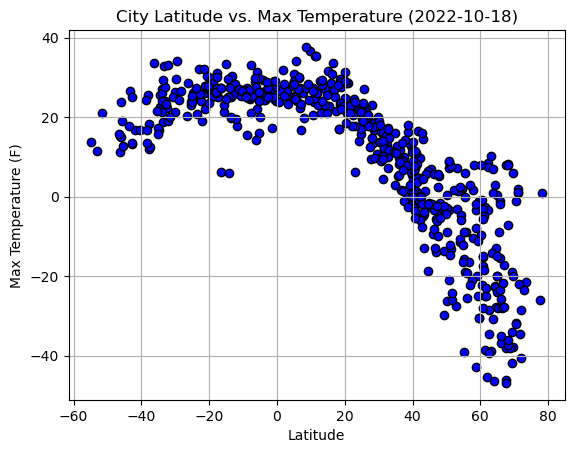

In [175]:
# # Build scatter plot for latitude vs. temperature
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

# import matplotlib.pyplot as plt



# # Sample data
# latitude = [-60,-40,-20,0,20,40,60,80]
# temperature = [-40,-20,0,20,40,60]

# # Create the plot
# plt.scatter(latitude, temperature, marker="o", facecolors="b", edgecolors="black")

# # Add title and labels
# plt.title("Latitude vs. Temperature")
# plt.xlabel("Latitude")
# plt.ylabel("Temperature (°C)")

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Max Temp"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()


# Save the figure
#plt.savefig("output/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

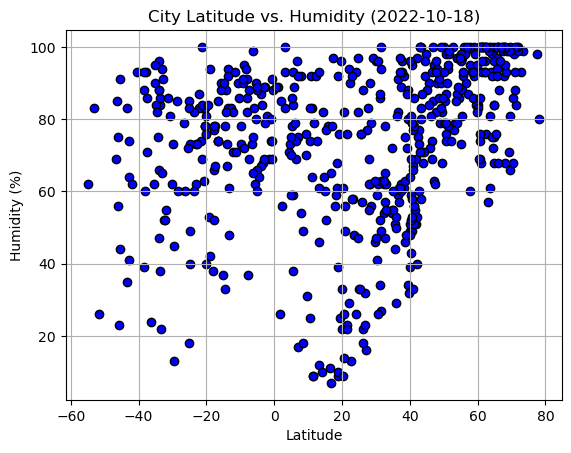

In [176]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(x=city_data_df["Lat"], y= city_data_df["Humidity"], facecolor="b", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

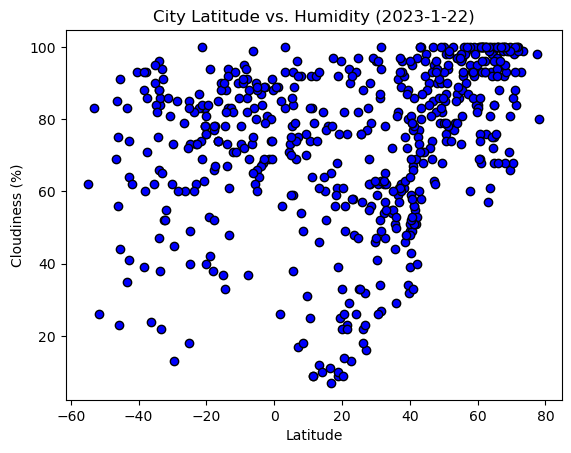

In [177]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Humidity"], facecolor="b", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE

# Sample data
latitude = [-60, -40, -20, 0, 20, 40, 60, 80]
cloudiness = [0, 20, 40, 60, 80, 100]

# Create the plot

# Add title and labels

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Humidity (2023-1-22)")


# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

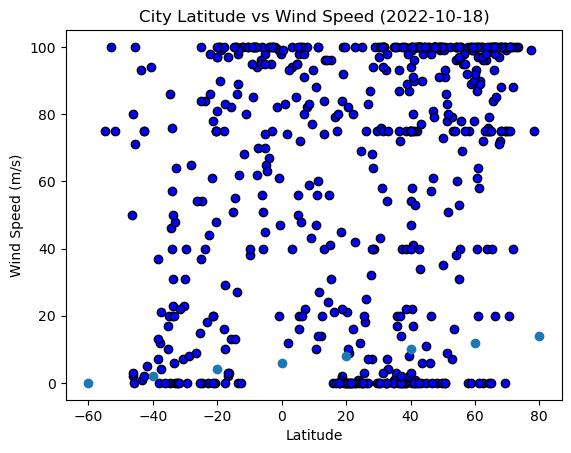

In [178]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

import matplotlib.pyplot as plt
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Cloudiness"], facecolor="b", edgecolors="black")

# Sample data
lat = [-60, -40, -20, 0, 20, 40, 60, 80]
wind_speed = [0,2,4,6,8,10,12,14]

# Build the scatter plot
plt.scatter(lat, wind_speed)

# Set the x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [155]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def create_linear_regression_plot(x, y, title, xlabel, ylabel, file_name):
    data = pd.DataFrame({'x': x, 'y': y})
    sns.regplot(x='x', y='y', data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(file_name)
    plt.show()


In [157]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,3.53,95,0,2.06,US,1675701094
3,gao,16.6362,1.6370,33.50,7,79,4.18,ML,1675701094
5,felanitx,39.4696,3.1483,12.75,80,87,5.15,ES,1675700687
7,dikson,73.5069,80.5464,-21.41,99,100,1.26,RU,1675701095
8,gubkinskiy,64.4340,76.5026,-22.45,99,100,2.17,RU,1675701096


In [158]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,atuona,-9.8000,-139.0333,25.64,73,38,7.49,PF,1675701009
2,punta arenas,-53.1500,-70.9167,11.47,83,100,7.12,CL,1675701094
4,mount gambier,-37.8333,140.7667,12.09,93,12,2.19,AU,1675701095
6,kerema,-7.9631,145.7785,24.66,91,100,2.12,PG,1675701095
10,busselton,-33.6500,115.3333,18.77,84,23,5.60,AU,1675701096


###  Temperature vs. Latitude Linear Regression Plot

rvalue is -0.853201656606955


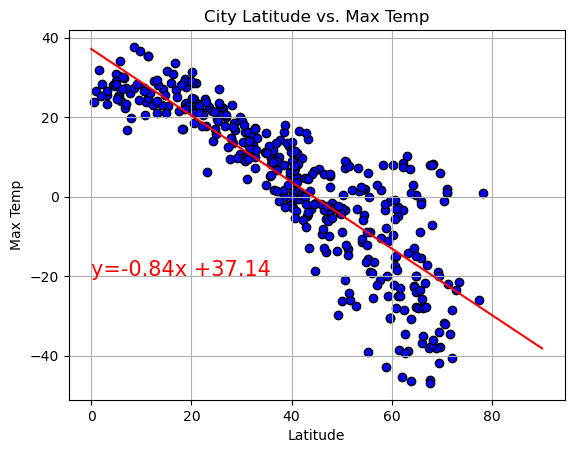

In [165]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

def lineregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_analysis = pd.DataFrame({"slope":[slope], "intercept":[intercept], "rvalue":[rvalue], "pvalue":[pvalue], "stderr":[stderr]})
    return print(f"rvalue is {rvalue}"), regression_analysis






regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Max Temp"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp")
plt.grid()




rvalue is 0.40203486779858666


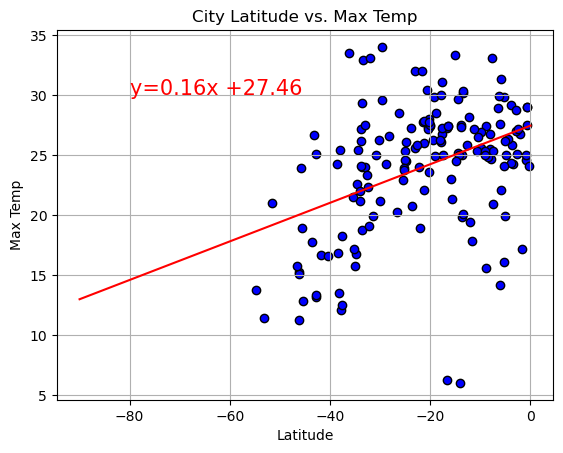

In [167]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Max Temp"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-80,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp")
plt.grid()



**Discussion about the linear relationship:The tempeture increases as we get closer to latitude 0

### Humidity vs. Latitude Linear Regression Plot

rvalue is 0.4903669292515317


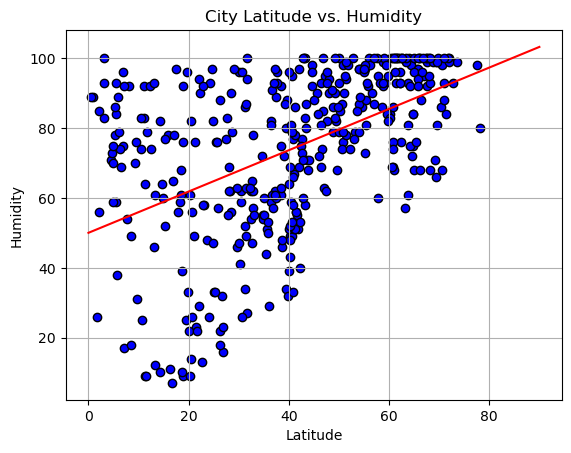

In [168]:
# Northern Hemisphere
# YOUR CODE HERE

regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Humidity"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()



rvalue is 0.25228369598539835


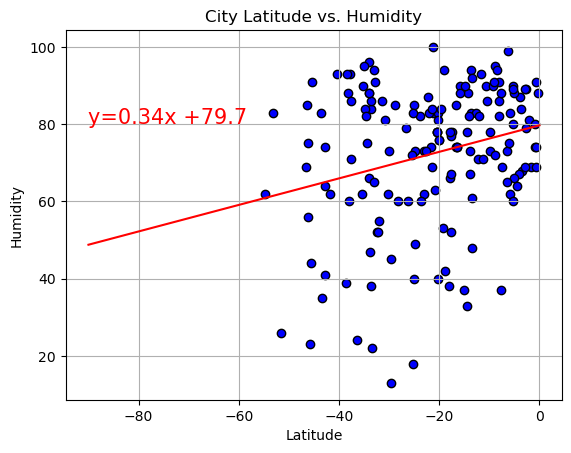

In [169]:
# Southern Hemisphere
# YOUR CODE HERE


regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Humidity"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()


**Discussion about the linear relationship:Humidity increases as we get closer to latitude 0 in the northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

rvalue is 0.2740099882168158


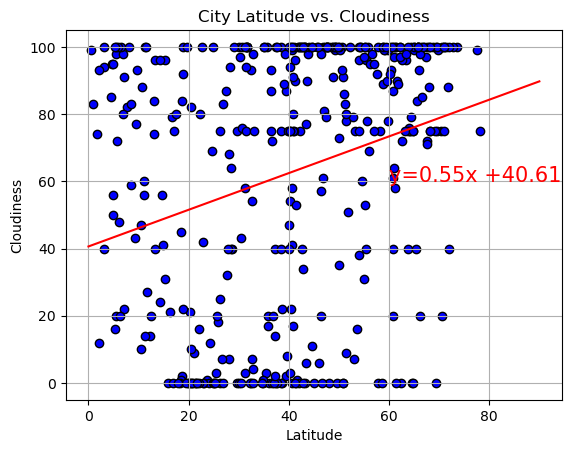

In [170]:
# Northern Hemisphere
# YOUR CODE HERE
regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(60,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()



rvalue is 0.4275170569813216


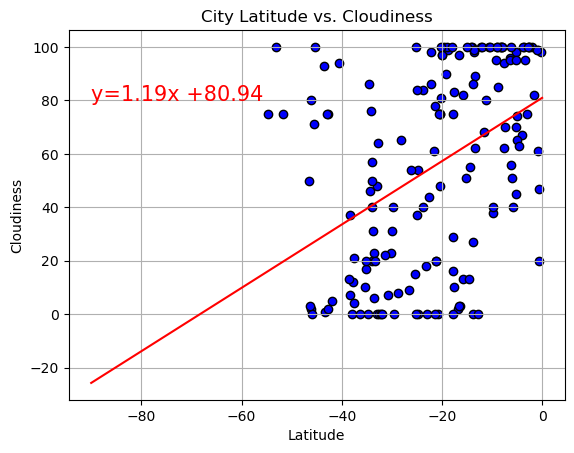

In [171]:
# Southern Hemisphere
# YOUR CODE HERE


regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()




**Discussion about the linear relationship: there is no correlation between lagtitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

rvalue is 0.031039607032922103


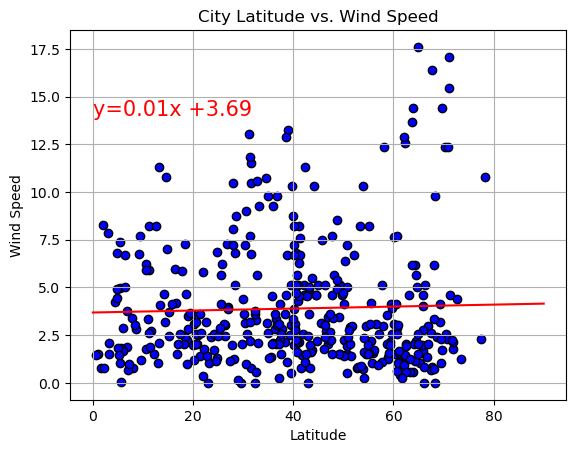

In [172]:
# Northern Hemisphere
# YOUR CODE HERE

regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Wind Speed"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid()


rvalue is -0.310185482449134


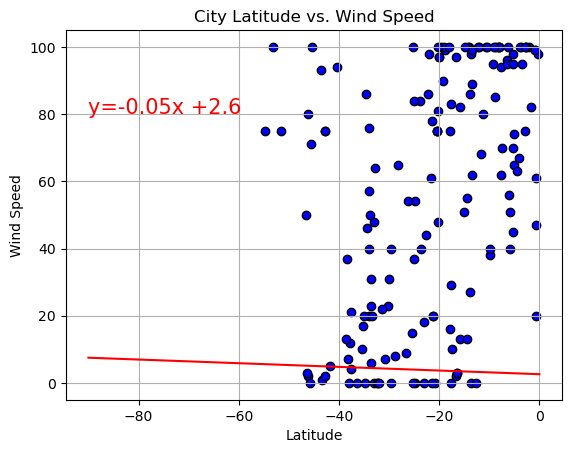

In [174]:
# Southern Hemisphere
# YOUR CODE HERE
regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid()



**Discussion about the linear relationship:No correlation between the latitude and the wind speed